# Machine Learning Lab 1: Linear Regression

## Oleksii Verkhola, DA-12, 2024

Importing the libraries used in this lab.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Loading the data using numpy, afterwards it will be split by columns.

The training data is plotted using matplotlib in a scatterplot.

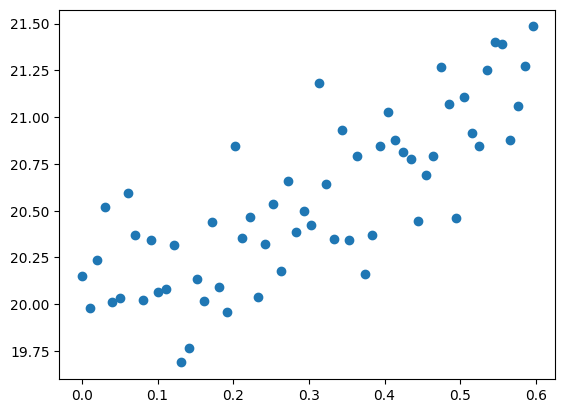

In [2]:
train_data = np.loadtxt("lab_1_train.csv", skiprows=1, usecols=(1, 2), delimiter=',')
test_data = np.loadtxt("lab_1_test.csv", skiprows=1, usecols=(1, 2), delimiter=',')

#train_data[:,0] - X
#train_data[:,1] - Y
plt.plot(train_data[:,0], train_data[:,1], 'o')
plt.show()

Implementing the required functions:

### MSE
Our cost function. Returns the Mean Squared Error between the true and predicted values.

### Gradient Descent
Prints the results of every epoch: the bias, weight and the MSE. Once the iterations run out or the change in cost is less than the threshold, the descent stops and the function returns w0 and w1.

In [3]:
def MSE(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

#gradient descent (descending gradientally)
def gradient_descent(x, y, alpha = 0.01, threshold = 1e-7, iterations = 10000):
    #bias (since it *has* to rise to at least the minimum value in the dataset, why not set it as that already?)
    #idk if this has any precedent I just know it makes sense in my silly little brain
    w0 = min(y)
    #weight
    w1 = 1.0
    n = len(x)
    #there's probably a better way of doing this but I don't know nearly enough python for this
    prev_cost = 10000.0

    for i in range(iterations):
        #predicting based on current variables
        y_pred = w0 + (w1 * x)

        #getting the cost (Error)
        current_cost = MSE(y, y_pred)

        #if the change in cost is less than the threshold, stop the gradient descent
        if abs(prev_cost - current_cost) < threshold:
            break

        prev_cost = current_cost
        #gradient calculation
        w0_grad = -(2/n) * np.sum(y - y_pred)
        w1_grad = -(2/n) * np.sum(x * (y - y_pred))

        #updating variables
        w0 = w0 - (alpha * w0_grad)
        w1 = w1 - (alpha * w1_grad)

        #printing iterations
        #this has to be the most confusing syntax ever
        print("Epoch {:3}\tw0 = {:>3.4}\tw1 = {:>3.4}\tMSE = {:.4}".format(i+1, w0, w1, current_cost))

    return w0, w1

Running the gradient descent function on our training data. (Separated for ease of reading)

In [4]:
w0_est, w1_est = gradient_descent(train_data[:,0], train_data[:,1], iterations = 5000)

Epoch   1	w0 = 19.7	w1 = 1.004	MSE = 0.4193
Epoch   2	w0 = 19.71	w1 = 1.008	MSE = 0.4052
Epoch   3	w0 = 19.72	w1 = 1.012	MSE = 0.3917
Epoch   4	w0 = 19.73	w1 = 1.015	MSE = 0.3788
Epoch   5	w0 = 19.74	w1 = 1.019	MSE = 0.3665
Epoch   6	w0 = 19.75	w1 = 1.023	MSE = 0.3546
Epoch   7	w0 = 19.76	w1 = 1.026	MSE = 0.3433
Epoch   8	w0 = 19.77	w1 = 1.03	MSE = 0.3325
Epoch   9	w0 = 19.78	w1 = 1.033	MSE = 0.3222
Epoch  10	w0 = 19.79	w1 = 1.036	MSE = 0.3123
Epoch  11	w0 = 19.8	w1 = 1.04	MSE = 0.3028
Epoch  12	w0 = 19.81	w1 = 1.043	MSE = 0.2937
Epoch  13	w0 = 19.82	w1 = 1.046	MSE = 0.2851
Epoch  14	w0 = 19.83	w1 = 1.049	MSE = 0.2768
Epoch  15	w0 = 19.83	w1 = 1.052	MSE = 0.2688
Epoch  16	w0 = 19.84	w1 = 1.055	MSE = 0.2612
Epoch  17	w0 = 19.85	w1 = 1.058	MSE = 0.2539
Epoch  18	w0 = 19.86	w1 = 1.061	MSE = 0.247
Epoch  19	w0 = 19.86	w1 = 1.064	MSE = 0.2403
Epoch  20	w0 = 19.87	w1 = 1.066	MSE = 0.2339
Epoch  21	w0 = 19.88	w1 = 1.069	MSE = 0.2278
Epoch  22	w0 = 19.89	w1 = 1.072	MSE = 0.222
Epoch  23	w0 = 1

Once the training is complete, we calculate the predicted values and calculate the error for our result. And plot the resulting data, of course.


w0 = 19.98  w1 = 1.925  MSE = 0.07312


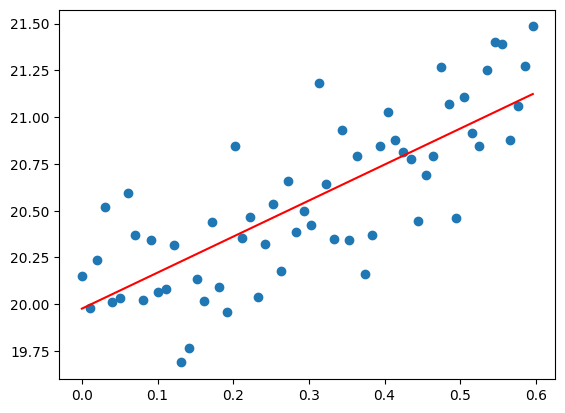

In [5]:
y_pred = w0_est + (w1_est * train_data[:,0])
error = MSE(train_data[:,1], y_pred)

print("w0 = {:>3.4}  w1 = {:>3.4}  MSE = {:.4}".format(w0_est, w1_est, error))

plt.plot(train_data[:,0], train_data[:,1], 'o')
plt.plot(train_data[:,0], y_pred, color='red')
plt.show()

The result was satisfactory enough to run our values on the test data.

We plot the test data along with the predicted values while calculating the MSE.

Test Data MSE = 0.07879


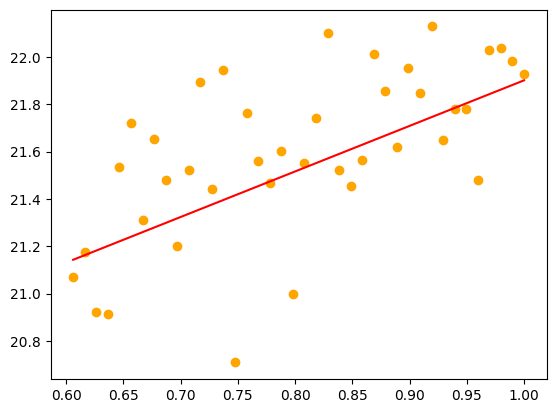

In [6]:
y_test = w0_est + (w1_est * test_data[:,0])
test_error = MSE(test_data[:,1], y_test)

print("Test Data MSE = {:.4}".format(test_error))

plt.plot(test_data[:,0], test_data[:,1], 'o', color='orange')
plt.plot(test_data[:,0], y_test, color='red')
plt.show()


Visualizing the full set of values, combinging the training and testing data along with the predicted line.

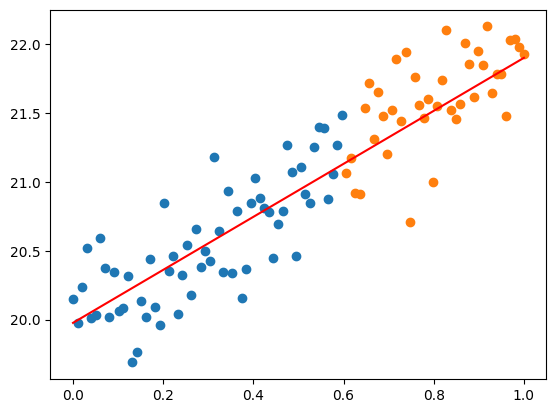

In [7]:
#visualizing full set
plt.plot(train_data[:,0], train_data[:,1], 'o')
plt.plot(test_data[:,0], test_data[:,1], 'o')
plt.plot((min(train_data[:,0]), max(test_data[:,0])),(min(y_pred), max(y_test)), color='red')

plt.show()